In [1]:
import numpy as np

import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import regionmask


In [3]:

ar6_all = regionmask.defined_regions.ar6.all
ar6_all

<regionmask.Regions 'AR6 reference regions'>
Source:   Iturbide et al., 2020 (ESSD)
overlap:  False

Regions:
 0 GIC      Greenland/Iceland
 1 NWN      N.W.North-America
 2 NEN      N.E.North-America
 3 WNA        W.North-America
 4 CNA        C.North-America
..  ..                    ...
53 ARS            Arabian-Sea
54 BOB          Bay-of-Bengal
55 EIO Equatorial.Indic-Ocean
56 SIO          S.Indic-Ocean
57 SOO         Southern-Ocean

[58 regions]

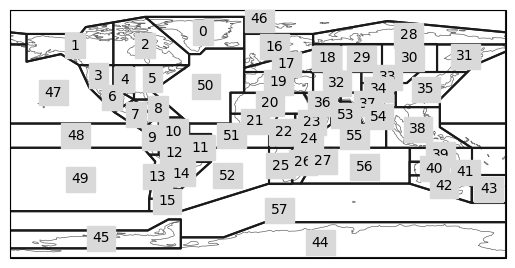

In [4]:
ax = ar6_all.plot()

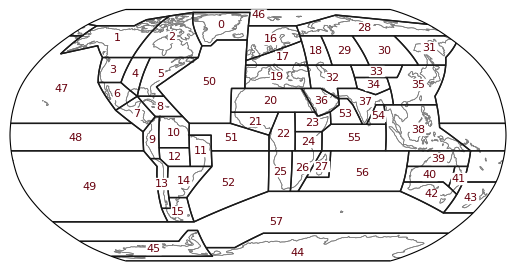

In [6]:
f, ax = plt.subplots(subplot_kw=dict(projection=ccrs.Robinson()))

text_kws = dict(color="#67000d", fontsize=8, bbox=dict(pad=0.2, color="w"))

ax = ar6_all.plot(
    ax=ax,
    add_ocean=False,
    line_kws=dict(linewidth=1),
    
    text_kws=text_kws,
)

ax.coastlines(color="0.5", lw=0.5);

In [7]:
new_zealand = ar6_all[[43]]
new_zealand

<regionmask.Regions 'AR6 reference regions'>
Source:   Iturbide et al., 2020 (ESSD)
overlap:  False

Regions:
43 NZ New-Zealand

[1 regions]

In [36]:

fN = ("Datos\Land_and_Ocean_EqualArea.nc") 

ds = xr.open_dataset(fN)

# Usar el valor entero (parte entera) de los tiempos flotantes como aproximación a "año"
# Esto asume que el año está representado directamente como un número flotante
years_approx = np.floor(ds['time'])

# Agrupar por estos años aproximados y calcular la media de la temperatura
temp = ds['temperature'].groupby(years_approx).mean('time')




In [37]:
ds

<xarray.Dataset> Size: 135MB
Dimensions:      (map_points: 15984, time: 2089, month_number: 12)
Coordinates:
    longitude    (map_points) float32 64kB ...
    latitude     (map_points) float32 64kB ...
  * time         (time) float64 17kB 1.85e+03 1.85e+03 ... 2.024e+03 2.024e+03
Dimensions without coordinates: map_points, month_number
Data variables:
    land_mask    (map_points) float64 128kB ...
    temperature  (time, map_points) float32 134MB ...
    climatology  (month_number, map_points) float32 767kB ...
Attributes:
    Conventions:           Berkeley Earth Internal Convention (based on CF-1.5)
    title:                 Native Format Berkeley Earth Surface Temperature A...
    history:               20-Feb-2024 09:56:45
    institution:           Berkeley Earth Surface Temperature Project
    land_source_history:   07-Feb-2024 05:19:02
    ocean_source_history:  20-Feb-2024 08:20:00
    comment:               This file contains Berkeley Earth surface temperat...

In [38]:
ds.map_points

<xarray.DataArray 'map_points' (map_points: 15984)> Size: 128kB
array([    0,     1,     2, ..., 15981, 15982, 15983], dtype=int64)
Coordinates:
    longitude  (map_points) float32 64kB ...
    latitude   (map_points) float32 64kB ...
Dimensions without coordinates: map_points

In [25]:
longitude = ds.variables['longitude'][:]  
latitude = ds.variables['latitude'][:]
time = ds.variables['time'][:]
land_mask = ds.variables['land_mask'][:]
temperature = ds.variables['temperature'][:]
climatology = ds.variables['climatology'][:]

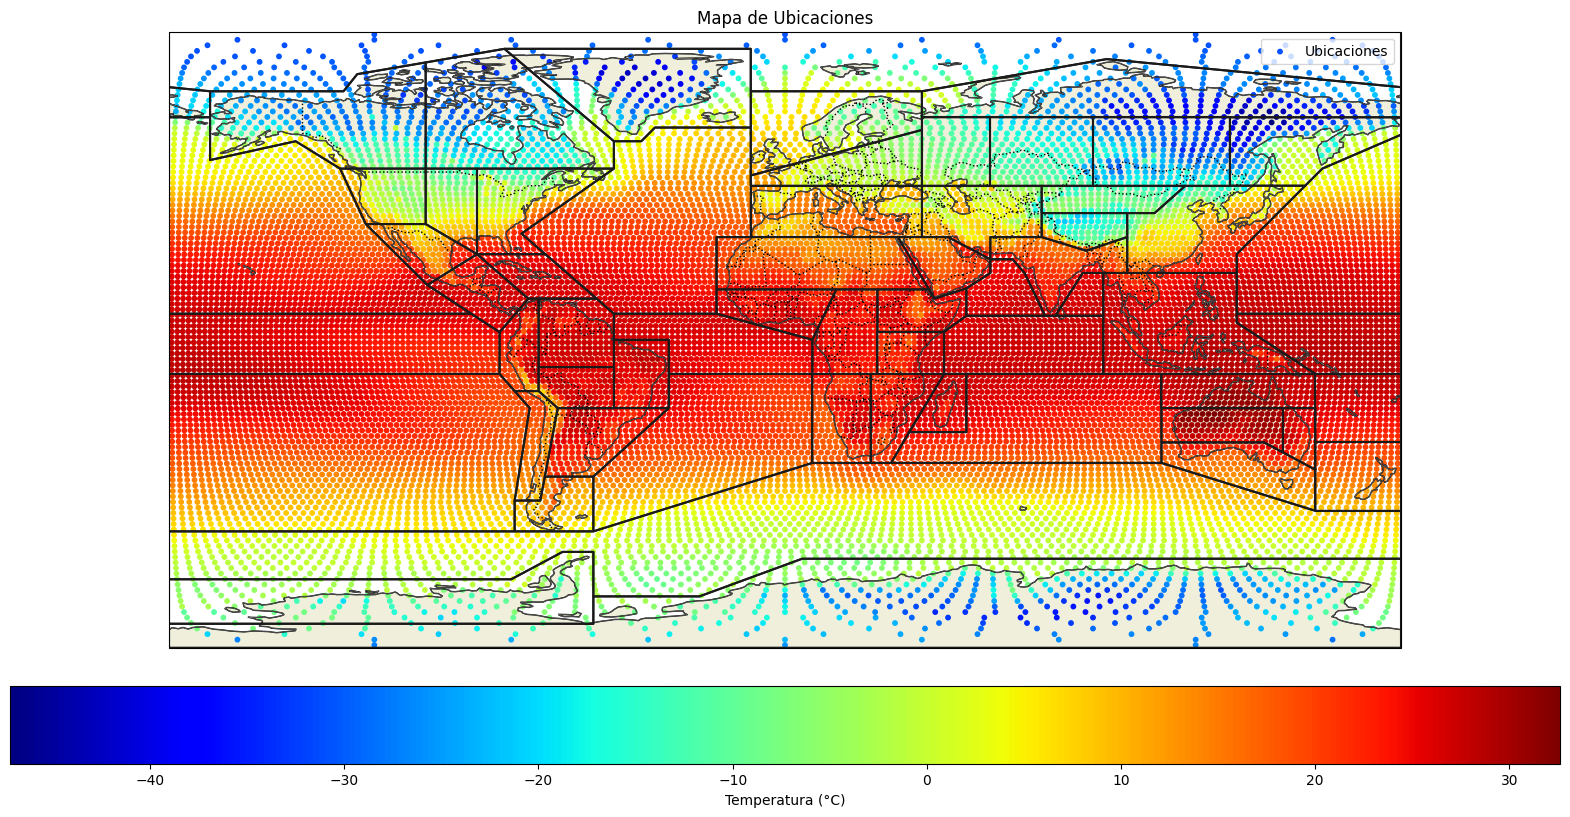

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Suponiendo que tienes un DataFrame llamado data con columnas 'lon', 'lat' para longitud y latitud
# data = pd.DataFrame({'lon': [-99.1332, -0.1257], 'lat': [19.4326, 51.5074], 'time': ['2021-01-01', '2021-01-02']})
# Define las regiones del AR6 utilizando regionmask
ar6_all = regionmask.defined_regions.ar6.all
# Crear una figura y un subplot con proyección
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_global()

# Añadir características al mapa
ax.add_feature(cfeature.LAND)
#ax.add_feature(cfeature.OCEANS)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Añadir los puntos de datos al mapa
scatter =ax.scatter(longitude, latitude,  c=climatology[-1], cmap='jet', s=10, transform=ccrs.Geodetic(), label='Ubicaciones')
cbar = plt.colorbar(scatter, ax=ax, orientation='horizontal', pad=0.05)
cbar.set_label('Temperatura (°C)')

ar6_all.plot(ax=ax, add_label=False)
# Añadir leyenda y título
ax.legend()
ax.set_title('Mapa de Ubicaciones')

plt.show()


In [39]:

ar6_land = regionmask.defined_regions.ar6.land

In [54]:
# Corrigiendo el error de referencia a la variable no definida, definiendo nuevamente la ruta del archivo
file_path = 'datos/Land_and_Ocean_EqualArea.nc'

# Intentando nuevamente cargar el archivo usando xarray
data_xr = xr.open_dataset(file_path)

# Mostrar la estructura general del dataset para entender cómo están organizados los datos
data_xr


<xarray.Dataset> Size: 135MB
Dimensions:      (map_points: 15984, time: 2089, month_number: 12)
Coordinates:
    longitude    (map_points) float32 64kB ...
    latitude     (map_points) float32 64kB ...
  * time         (time) float64 17kB 1.85e+03 1.85e+03 ... 2.024e+03 2.024e+03
Dimensions without coordinates: map_points, month_number
Data variables:
    land_mask    (map_points) float64 128kB ...
    temperature  (time, map_points) float32 134MB ...
    climatology  (month_number, map_points) float32 767kB ...
Attributes:
    Conventions:           Berkeley Earth Internal Convention (based on CF-1.5)
    title:                 Native Format Berkeley Earth Surface Temperature A...
    history:               20-Feb-2024 09:56:45
    institution:           Berkeley Earth Surface Temperature Project
    land_source_history:   07-Feb-2024 05:19:02
    ocean_source_history:  20-Feb-2024 08:20:00
    comment:               This file contains Berkeley Earth surface temperat...

In [45]:
# Analizar el 'land_mask' para entender cómo se distingue entre tierra y mar


array([0.00000000e+00, 2.94117640e-04, 3.57142849e-04, ...,
       9.99871767e-01, 9.99883696e-01, 1.00000000e+00])

In [70]:
# Olvidé importar pandas, así que lo haré ahora para trabajar con fechas y agrupaciones por año
import pandas as pd

# Repetir el proceso de conversión de tiempo y cálculo de temperaturas promedio anuales para tierra y mar

# Parece que olvidé importar numpy, así que lo haré ahora
import numpy as np
land_mask_values = data_xr['land_mask'].values
# Intentar nuevamente analizar el 'land_mask'
unique_land_mask_values = np.unique(land_mask_values)
unique_land_mask_values

# Usar el valor entero (parte entera) de los tiempos flotantes como aproximación a "año"
# Esto asume que el año está representado directamente como un número flotante
dates = np.floor(data_xr['time'])

# Agrupar por estos años aproximados y calcular la media de la temperatura
temp = ds['temperature'].groupby(years_approx).mean('time')


# Separar las temperaturas en tierra y mar basándose en el 'land_mask'
# Considerar cualquier valor de 'land_mask' > 0 como tierra
is_land = land_mask_values > 0

# Temperaturas donde es tierra
temperature_land = data_xr['temperature'].where(is_land)

# Temperaturas donde es mar (negación de is_land)
temperature_sea = data_xr['temperature'].where(~is_land)

# Calcular la temperatura media anual para tierra y mar
annual_mean_temperature_land = temperature_land.groupby(dates).mean(dim=['time', 'map_points'])
annual_mean_temperature_sea = temperature_sea.groupby(dates).mean(dim=['time', 'map_points'])
# Calcular la varianza anual para tierra y mar
annual_var_temperature_land = temperature_land.groupby(dates).var(dim=['time', 'map_points'])
annual_var_temperature_sea = temperature_sea.groupby(dates).var(dim=['time', 'map_points'])

annual_mean_temperature_land, annual_mean_temperature_sea


(<xarray.DataArray 'temperature' (time: 175)> Size: 700B
 array([-0.6116513 , -0.39715376, -0.47131598, -0.46754357, -0.34948713,
        -0.4413031 , -0.47487193, -0.7085741 , -0.42646918, -0.22443046,
        -0.56777054, -0.64176524, -0.9526564 , -0.35228318, -0.54712564,
        -0.35908064, -0.30264416, -0.19803175, -0.3843545 , -0.17906176,
        -0.3883681 , -0.4960546 , -0.3950557 , -0.2930972 , -0.19983791,
        -0.5749346 , -0.4199104 , -0.03559515,  0.28798628, -0.32406768,
        -0.4399538 , -0.23830725, -0.3737743 , -0.46876946, -0.66265595,
        -0.5442405 , -0.52421963, -0.5807033 , -0.38082722, -0.17662732,
        -0.52965444, -0.46818283, -0.45980513, -0.44748312, -0.35957053,
        -0.337237  , -0.28654888, -0.18221706, -0.36105296, -0.1542841 ,
        -0.00983609, -0.0572198 , -0.31903154, -0.3496894 , -0.47634688,
        -0.332733  , -0.1995229 , -0.5578545 , -0.39380157, -0.39708263,
        -0.37141582, -0.41177544, -0.41592464, -0.3353899 , -0.0640

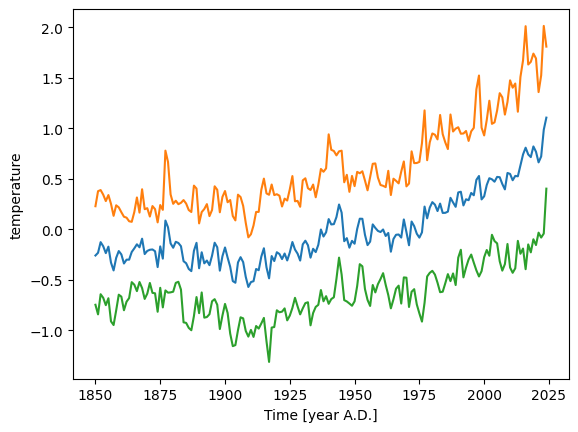

In [86]:
annual_mean_temperature_sea.plot( )
(annual_mean_temperature_sea+annual_var_temperature_sea).plot()
(annual_mean_temperature_sea-annual_var_temperature_sea).plot()

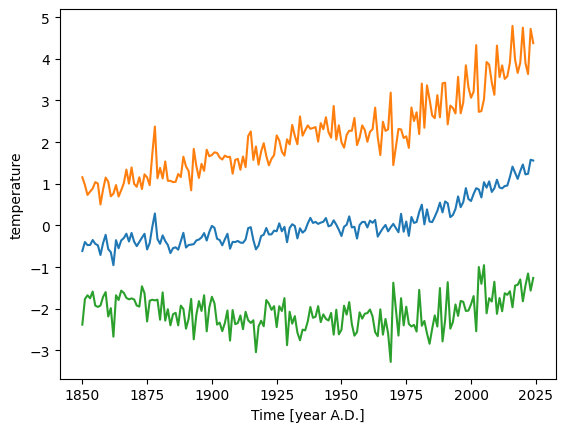

In [84]:
annual_mean_temperature_land.plot( )
(annual_mean_temperature_land+annual_var_temperature_land).plot()
(annual_mean_temperature_land-annual_var_temperature_land).plot()

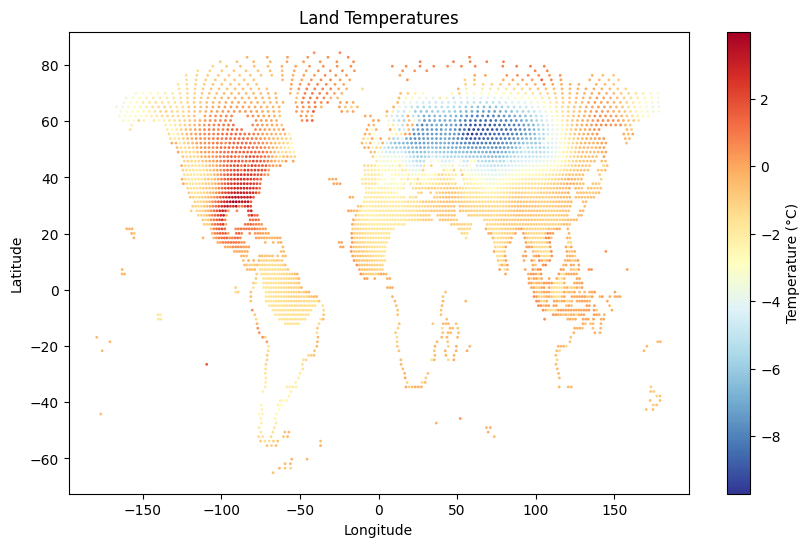

In [80]:
import matplotlib.pyplot as plt
import numpy as np

# Aplicar la máscara de tierra a los datos de temperatura
# Considerar cualquier valor de 'land_mask' > 0 como tierra
is_land = data_xr['land_mask'] > 0
temperature_land_only = data_xr['temperature'].isel(time=0).where(is_land, drop=True)

# Preparar los datos de latitud y longitud para el plot
longitude = data_xr['longitude'].values[is_land]
latitude = data_xr['latitude'].values[is_land]
temperature_values = temperature_land_only.values

# Crear el mapa usando scatter para mostrar solo las temperaturas de la tierra
plt.figure(figsize=(10, 6))
plt.scatter(longitude, latitude, c=temperature_values, s=1, cmap='RdYlBu_r')
plt.colorbar(label='Temperature (°C)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Land Temperatures')
plt.show()

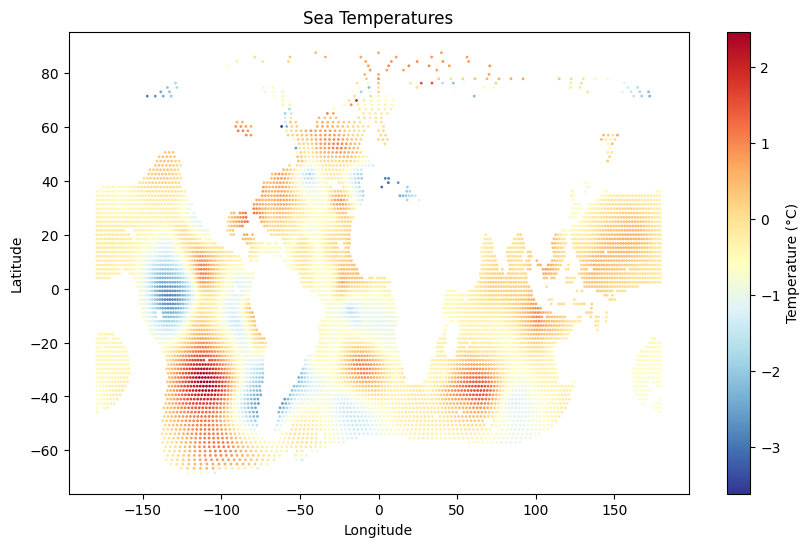

In [77]:
import matplotlib.pyplot as plt
import numpy as np

# Aplicar la máscara de tierra a los datos de temperatura
# Considerar cualquier valor de 'land_mask' > 0 como tierra
is_land = data_xr['land_mask'] > 0
temperature_land_only = data_xr['temperature'].isel(time=0).where(~is_land, drop=True)

# Preparar los datos de latitud y longitud para el plot
longitude = data_xr['longitude'].values[~is_land]
latitude = data_xr['latitude'].values[~is_land]
temperature_values = temperature_land_only.values

# Crear el mapa usando scatter para mostrar solo las temperaturas de la tierra
plt.figure(figsize=(10, 6))
plt.scatter(longitude, latitude, c=temperature_values, s=1, cmap='RdYlBu_r')
plt.colorbar(label='Temperature (°C)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Sea Temperatures')
plt.show()

In [91]:
pip install cf_xarray


     ---------------------------------------- 61.4/61.4 kB 1.1 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: C:\Users\danie\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [113]:
import regionmask

# Definir las regiones AR6 del IPCC usando regionmask
regions_ar6 = regionmask.defined_regions.ar6.all

# Mostrar la región 57 para entender qué abarca
region_57 = regions_ar6[57]
region_57


<regionmask._OneRegion: Southern-Ocean (SOO / 57)>

In [114]:
mask = regions_ar6.mask(ds, lon_name='longitude', lat_name='latitude')


C:\Users\danie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\regionmask\core\mask.py:179: FutureWarning: Passing 'lon_name' and 'lat_name' was deprecated in v0.10.0. Please pass the coordinates directly, e.g., `mask*(ds[lon_name], ds[lat_name])`.
  warnings.warn(


In [115]:
region_57_temp = ds.where(mask == 57)


In [116]:
average_temp_region_57 = region_57_temp.mean()


In [118]:
average_temp_region_57_cf = region_57_temp.cf['temperature'].mean()


In [92]:
import cf_xarray as cfxr
import xarray as xr

xr.set_options(keep_attrs=True)

ds1 = xr.tutorial.open_dataset("air_temperature")
ds1

<xarray.Dataset> Size: 31MB
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float64 31MB ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [93]:
ds1.cf

Coordinates:
             CF Axes: * X: ['lon']
                      * Y: ['lat']
                      * T: ['time']
                        Z: n/a

      CF Coordinates: * longitude: ['lon']
                      * latitude: ['lat']
                      * time: ['time']
                        vertical: n/a

       Cell Measures:   area, volume: n/a

      Standard Names: * latitude: ['lat']
                      * longitude: ['lon']
                      * time: ['time']

              Bounds:   n/a

       Grid Mappings:   n/a

Data Variables:
       Cell Measures:   area, volume: n/a

      Standard Names:   n/a

              Bounds:   n/a

       Grid Mappings:   n/a

In [94]:
ds.cf

Coordinates:
             CF Axes: * T: ['time']
                        X, Y, Z: n/a

      CF Coordinates:   longitude: ['longitude']
                        latitude: ['latitude']
                      * time: ['time']
                        vertical: n/a

       Cell Measures:   area, volume: n/a

      Standard Names:   latitude: ['latitude']
                        longitude: ['longitude']
                      * time: ['time']

              Bounds:   n/a

       Grid Mappings:   n/a

Data Variables:
       Cell Measures:   area, volume: n/a

      Standard Names:   land_mask: ['land_mask']
                        surface_temperature_anomaly: ['temperature']
                        surface_temperature_climatology: ['climatology']

              Bounds:   n/a

       Grid Mappings:   n/a

In [102]:
ds.cf.standard_names

{'longitude': ['longitude'],
 'latitude': ['latitude'],
 'time': ['time'],
 'land_mask': ['land_mask'],
 'surface_temperature_anomaly': ['temperature'],
 'surface_temperature_climatology': ['climatology']}

In [101]:
ds.cf.axes

{'T': ['time']}

In [103]:
ds.cf.grid_mapping_names


{}

In [104]:
from cf_xarray.datasets import airds

air = airds.air
air.cf

Coordinates:
             CF Axes: * X: ['lon']
                        Y: ['cell_area', 'lat']
                      * T: ['time']
                        Z: n/a

      CF Coordinates: * longitude: ['lon']
                        latitude: ['cell_area', 'lat']
                      * time: ['time']
                        vertical: n/a

       Cell Measures:   area: ['cell_area']
                        volume: n/a

      Standard Names:   latitude: ['cell_area', 'lat']
                      * longitude: ['lon']
                      * time: ['time']

              Bounds:   n/a

       Grid Mappings:   n/a

In [110]:
air.cf.plot(x="longitude", y="latitude", col="T")

KeyError: "Receive multiple variables for key 'latitude': ['cell_area', 'lat']. Expected only one. Please pass a list ['latitude'] instead to get all variables matching 'latitude'."